# First experiments in Leder medical review texts  classification

From https://towardsdatascience.com/multi-label-text-classification-with-scikit-learn-30714b7819c5


In [1]:
%matplotlib inline
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns

In [2]:
path = '\\\\ads\\filestore\\Deaf_Studies\\Deaf\\nfrc\\LeDeR confidential\\Data Entry\\Avon\\reviews_leder_revised_codes\\python_notebooks\\master_nvivo_df.pickle'
master_nvivo_df = pd.read_pickle(path)

# Get list of categories/labels
And the number of times they are used


In [3]:
nvivo_flags = master_nvivo_df.select_dtypes(include=['float64'])


In [4]:
nvivo_flags_counts = nvivo_flags.sum(axis = 0, skipna = True).to_frame(0).reset_index()
nvivo_flags_counts.columns=[['label','number']]
# need to get_level_values as comes from a created multui-index df
nvivo_flags_counts.columns=nvivo_flags_counts.columns.get_level_values(0)
label_count_df = nvivo_flags_counts.sort_values(['number'], ascending=False)
label_count_df.to_csv('label_count_df.csv',index=False)

In [5]:
label_count_df

,label,number
126,Circumstances_of_death,1453.0
321,MCA_comments,1231.0
160,DNACPR_comments,1010.0
135,Clinical_condition,1003.0
322,Medical_histories,721.0
269,Issues_agencies,720.0
463,Professional_health_support_primary,710.0
417,Previous_hospital_admissions,698.0
323,Medical_intervention_details,689.0
112,Care_plan_EOL,679.0


# select some labels to try
that are not ligher level in the tree, but leaves, and yet have many examples
e.g. 
 - Professional_health_support_primary
 - Care_plan_EOL
 - Epilepsy

In [6]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer

# Create a LEDER dictinary for key varaibles based on number of times used to date

In [7]:
target_dict = {
    'MCA_comments':0,
    'DNACPR_comments': 1,
    'Care_plan_EOL': 2,
    'Any_aids_employed': 3,
    'Epilepsy': 4,
    'Swallowing_issues_dysphagia':5,
    'Clinical_history_chest_infections': 6,
    'Holidays': 7,
    'Behaviour_problems': 8,
    'Professional_health_support_primary': 9
}

Now use this dictionary to select texts  

In [8]:
numbers = []
texts_list = []

for var in target_dict.keys():
    print(' variable is ',var)
    temp = master_nvivo_df[[var,var+'_atext']]
    temp2 = temp[temp[var] == 1]
    # print(temp2.head())
    text = temp2[var+'_atext'].tolist()
    texts_list.append(text)
    
    x = len(temp2)
    print('number is ',target_dict[var])
    # createlist from integer and copied by number of elemnts 
    l = [ int(item) for item in str(target_dict[var]) ] * x
    numbers.append(l)

    
# now flatten list to get into required format for sklearn SVC
flat_list = [item for sublist in numbers for item in sublist]

 variable is  MCA_comments
number is  0
 variable is  DNACPR_comments
number is  1
 variable is  Care_plan_EOL
number is  2
 variable is  Any_aids_employed
number is  3
 variable is  Epilepsy
number is  4
 variable is  Swallowing_issues_dysphagia
number is  5
 variable is  Clinical_history_chest_infections
number is  6
 variable is  Holidays
number is  7
 variable is  Behaviour_problems
number is  8
 variable is  Professional_health_support_primary
number is  9


In [9]:
variables_array = np.asarray(flat_list)
variables_array

array([0, 0, 0, ..., 9, 9, 9])

In [10]:
texts_list
flat_texts_list = [item for sublist in texts_list for item in sublist]
#flat_texts_list


In [11]:
count_vect = CountVectorizer()

x_train_counts = count_vect.fit_transform(flat_texts_list)


In [12]:
tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)


In [13]:
train_x, test_x, train_y, test_y = train_test_split(x_train_tfidf, variables_array, test_size=0.3)


# Naive Bayes

In [14]:
clf = MultinomialNB().fit(train_x, train_y)
y_score = clf.predict(test_x)

In [15]:
type(train_x)

scipy.sparse.csr.csr_matrix

In [16]:
len(y_score)

2013

In [17]:
n_right = 0
for i in range(len(y_score)):
    if y_score[i] == test_y[i]:
        n_right += 1

print("Accuracy: %.2f%%" % ((n_right/float(len(test_y)) * 100)))

Accuracy: 64.48%


Not a very good accuracy, so try SVM classifier.

# Using SVM


In [18]:
from sklearn.svm import SVC
clf = SVC(kernel='linear',probability=True).fit(train_x, train_y)

In [19]:
y_score = clf.predict(test_x)

In [20]:
results = clf.predict_proba(test_x)[1]
# gets a dictionary of {'class_name': probability}
prob_per_class_dictionary = dict(zip(clf.classes_, results))


In [21]:
prob_per_class_dictionary

{0: 2.860651505950432e-07,
 1: 2.0999321381931684e-07,
 2: 1.5483333206901903e-07,
 3: 4.0240312723859993e-07,
 4: 2.094733689692141e-07,
 5: 3.656423422521935e-07,
 6: 0.9992778625095886,
 7: 1.254997091176592e-06,
 8: 1.970842994629042e-05,
 9: 0.0006995456528388346}

In [22]:
# gets a list of ['most_probable_class', 'second_most_probable_class', ..., 'least_class']
results_ordered_by_probability = map(lambda x: x[0], sorted(zip(clf.classes_, results), key=lambda x: x[1], reverse=True))
list(results_ordered_by_probability)

[6, 9, 8, 7, 3, 5, 0, 1, 4, 2]

In [23]:
n_right = 0
for i in range(len(y_score)):
    if y_score[i] == test_y[i]:
        n_right += 1

print("Accuracy: %.2f%%" % ((n_right/float(len(test_y)) * 100)))

Accuracy: 91.41%


In [24]:
keys = np.array(list(target_dict.keys()))
len(keys)

10

Confusion matrix, without normalization
[[365  18   9   3   1   0   1   1   0   2]
 [ 13 259  16   0   0   2   3   0   0   3]
 [  6  12 176   0   1   0   2   0   1   2]
 [  6   0   1 175   0   2   0   1   0   1]
 [  0   0   1   0 174   1   1   0   2   2]
 [  3   0   1   1   2 123   6   0   0   3]
 [  3   1   0   0   1   2 173   0   0   6]
 [  1   0   0   0   0   0   0  86   0   1]
 [  4   0   0   2   1   3   1   0 115   1]
 [  3   2   1   1   1   0   7   0   1 194]]


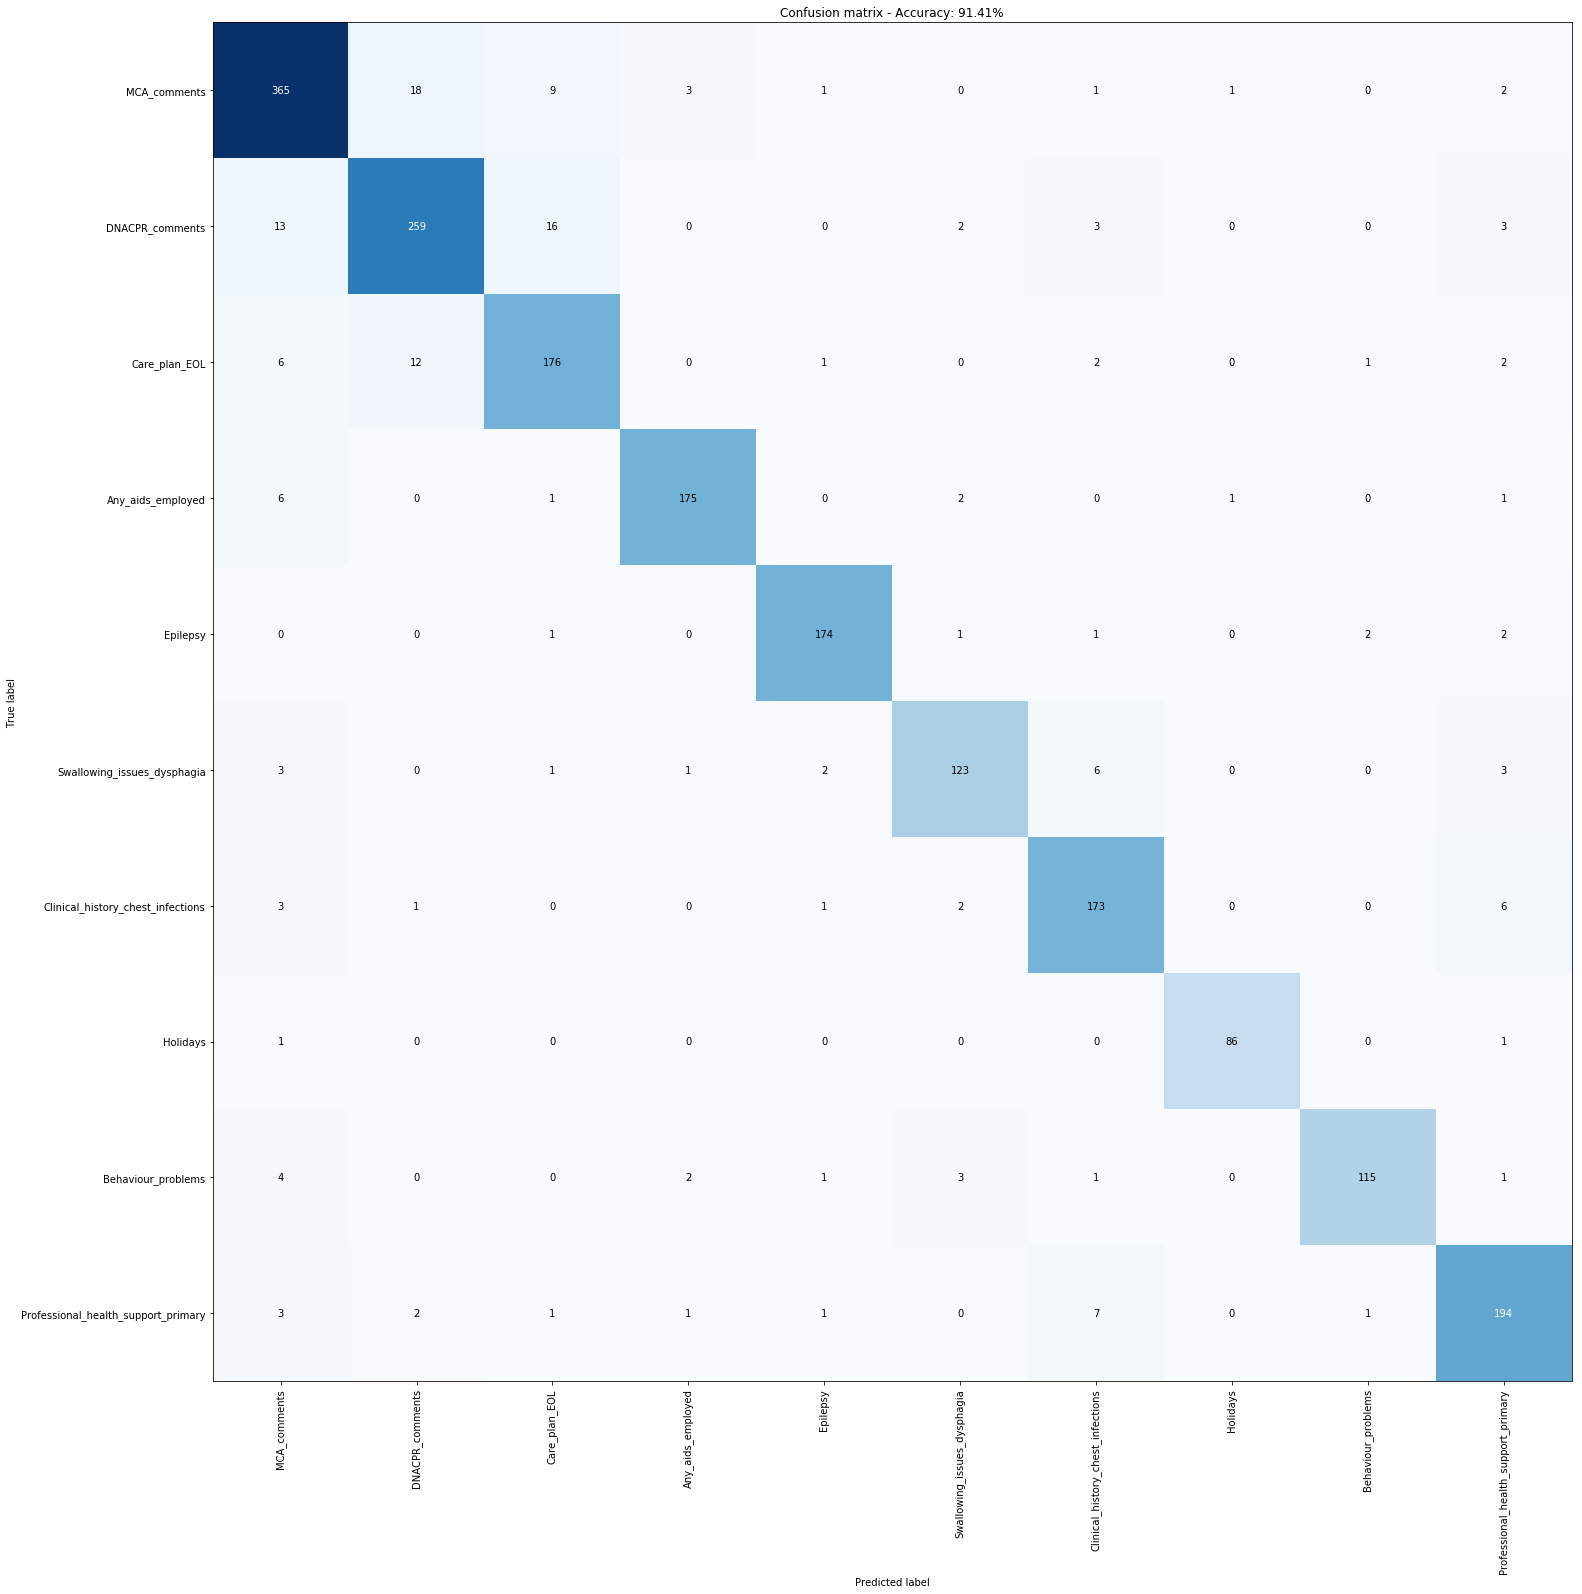

In [25]:
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title + " - Accuracy: %.2f%%" % ((n_right/float(len(test_y)) * 100)))
    # plt.colorbar()
    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.xticks(np.arange(len(keys)), keys, rotation=90)
    plt.yticks(np.arange(len(keys)), keys, rotation=0)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")    
    plt.savefig('confusion_matrix.pdf')
    
# Compute confusion matrix
cm = confusion_matrix(test_y, y_score)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(figsize=(25,25))
plot_confusion_matrix(cm)

# Need to apply to free text though, not to selected texts, which exclude much and so likely bias result


In [26]:
# get a list of strings (sentences or paragraphs?) from a real case

import os

# get latest filename for CCR_SPSS from folder in Leder Confidential
# Note that this SPSS-ready  file takes yes/no and makes them digit 1 or 2, for example, in certain columns
ccr_spss_folder_path = ('\\\\ads\\filestore\\Deaf_Studies\\Deaf\\nfrc\\LeDeR confidential\\Data Entry\\csv files\\Combined Case Review csvs\\')

# get list of filenames that match pattern of proper CCR SPSS files
ccr_spss_files_names = []
for root, directories, files in os.walk(ccr_spss_folder_path):
    for filename in files:
        if (filename[0:26]=='Combined-Case-Reviews-SPSS'):
            if (filename[42:]=='.csv'):
                ccr_spss_files_names.append(filename)

ccr_spss_files_names.sort(reverse=True)
latest_ccr_spss_file = ccr_spss_files_names[0]
# print latest filename as sanity check
print('CCR_SPSS file used = ', latest_ccr_spss_file)

# read in latest Combined Case Reviews SPSS data to a df
ccr_spss_path = ('\\\\ads\\filestore\\Deaf_Studies\\Deaf\\nfrc\\LeDeR confidential\\Data Entry\\csv files\\Combined Case Review csvs\\' + latest_ccr_spss_file)
ccr_spss_reader = pd.read_csv(ccr_spss_path, low_memory=False)
ccr_spss_all_df = pd.DataFrame(ccr_spss_reader)
ccr_spss_all_df[['IRVersion']] = ccr_spss_all_df[['IRVersion']].astype(str)

ccr_spss_df = ccr_spss_all_df[ccr_spss_all_df.fileDate!='DISREGARDED'].copy()
ccr_spss_completed_df = ccr_spss_df[(ccr_spss_df['Stage Numbered']==7)].copy() # stage = archived


CCR_SPSS file used =  Combined-Case-Reviews-SPSS-2019-07-03-0101.csv


# All cells below are deactivated as they would display personal data from a medical case

In [27]:
import datetime
print('JOB COMPLETE AT: ',str(datetime.datetime.now()).split('.')[0])


JOB COMPLETE AT:  2019-07-04 11:21:25
